Arquivo com correlações que rejeitaram H₀ salvo em 'resultado_correlacoes_fora_intervalo.csv' (20 registros).

Quadro 1 - Comparações entre Sorteios:

                                                                     Descrição Quantidade                 Cálculo
  Total de comparações entre todos os sorteios (inclui repetidas e a diagonal)     295936               544 × 544
                Comparações da diagonal principal (cada sorteio com ele mesmo)        544                     544
                                     Total de comparações excluindo a diagonal     295392       (544 × 544) - 544
Comparações únicas entre pares distintos (elimina duplicidades como A×B e B×A)     147696 ((544 × 544) - 544) ÷ 2


Quadro 2 - Resultados dos Testes de Correlação:

                  Descrição Faixa de p-valor Quantidade Percentual (%)
               Aceitaram H₀         p > 0,05     147676      99.986459
Rejeitaram H₀ moderadamente  0,01 < p ≤ 0,05         16       0.010833
   Rejeitaram H

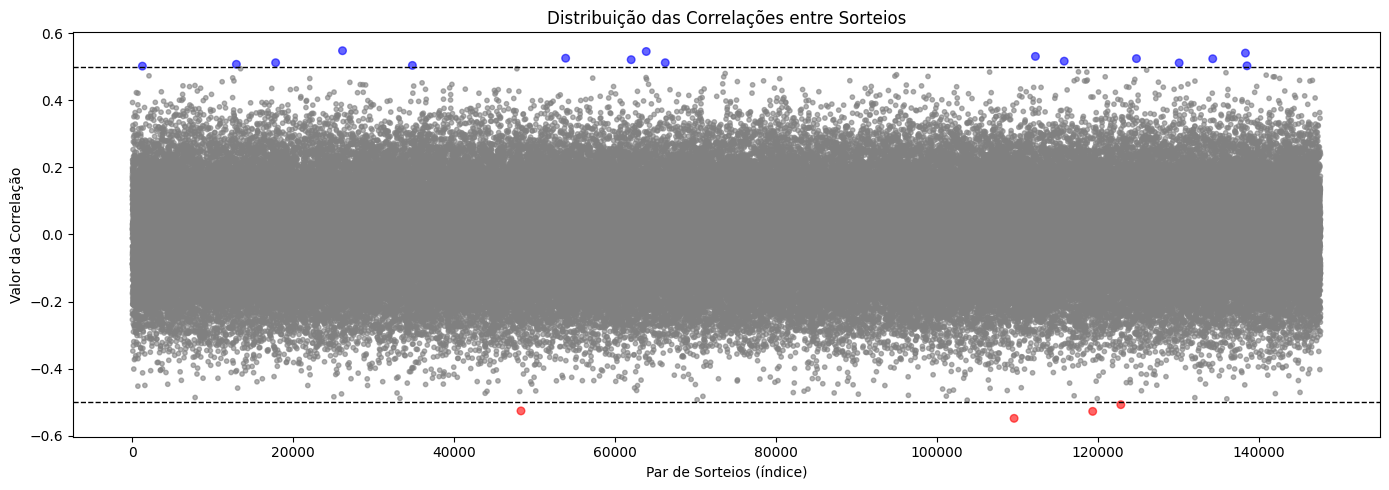

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

pd.options.display.float_format = '{:.4f}'.format
warnings.filterwarnings("ignore")

file_path = '5-correlacoes_sorteios.csv'
output_path = "resultado_correlacoes_fora_intervalo.csv"  # arquivo só com rejeições H0

try:
    # ====== LEITURA E CONVERSÃO ======
    df = pd.read_csv(file_path, sep="\t", decimal=",")
    df_numeric = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

    # ====== CONSTANTES DINÂMICAS ======
    nr_sorteios_x = df_numeric.shape[1]
    nr_sorteios_y = df_numeric.shape[0]

    # ====== CLASSIFICAÇÃO DAS CORRELAÇÕES ======
    correlacoes = []
    for i in range(nr_sorteios_y):
        for j in range(i + 1, nr_sorteios_x):
            valor = df_numeric.iat[i, j]
            if pd.notnull(valor):
                if valor > 0.5:
                    resultado = "Rejeitaram H₀ moderadamente"
                elif valor < -0.5:
                    resultado = "Rejeitaram H₀ fortemente"
                else:
                    resultado = "Aceitaram H₀"
                correlacoes.append({
                    'Sorteio X': i + 1,
                    'Sorteio Y': j + 1,
                    'Correlação': valor,
                    'Resultado do Teste': resultado
                })

    df_correlacoes_final = pd.DataFrame(correlacoes)

    # ====== EXPORTAR APENAS REJEIÇÕES DE H0 ======
    df_rejeicoes = df_correlacoes_final[df_correlacoes_final['Resultado do Teste'] != "Aceitaram H₀"]
    df_rejeicoes.to_csv(output_path, index=False)
    print(f"Arquivo com correlações que rejeitaram H₀ salvo em '{output_path}' ({len(df_rejeicoes)} registros).")

    # ====== QUADRO 1 - COMPARAÇÕES ENTRE SORTEIOS ======
    total_combinacoes = nr_sorteios_x * nr_sorteios_y
    diagonal = min(nr_sorteios_x, nr_sorteios_y)
    sem_diagonal = total_combinacoes - diagonal
    pares_unicos = sem_diagonal / 2

    quadro_comparacoes = pd.DataFrame([
        ["Total de comparações entre todos os sorteios (inclui repetidas e a diagonal)", total_combinacoes, f"{nr_sorteios_x} × {nr_sorteios_y}"],
        ["Comparações da diagonal principal (cada sorteio com ele mesmo)", diagonal, f"{diagonal}"],
        ["Total de comparações excluindo a diagonal", sem_diagonal, f"({nr_sorteios_x} × {nr_sorteios_y}) - {diagonal}"],
        ["Comparações únicas entre pares distintos (elimina duplicidades como A×B e B×A)", pares_unicos, f"(({nr_sorteios_x} × {nr_sorteios_y}) - {diagonal}) ÷ 2"]
    ], columns=["Descrição", "Quantidade", "Cálculo"])

    print("\nQuadro 1 - Comparações entre Sorteios:\n")
    print(quadro_comparacoes.to_string(index=False, formatters={
        'Quantidade': '{:.0f}'.format
    }))
    print()

    # ====== QUADRO 2 - RESUMO POR FAIXA ======
    total_valores_utilizados = df_numeric.shape[1] * (df_numeric.shape[0] - 1) / 2

    contagens = df_correlacoes_final['Resultado do Teste'].value_counts()
    faixas = {
        "Aceitaram H₀": "p > 0,05",
        "Rejeitaram H₀ moderadamente": "0,01 < p ≤ 0,05",
        "Rejeitaram H₀ fortemente": "p ≤ 0,01"
    }

    resumo_p_valor = pd.DataFrame([
        [descricao, faixas[descricao], contagens.get(descricao, 0), contagens.get(descricao, 0) / total_valores_utilizados * 100]
        for descricao in ["Aceitaram H₀", "Rejeitaram H₀ moderadamente", "Rejeitaram H₀ fortemente"]
    ], columns=["Descrição", "Faixa de p-valor", "Quantidade", "Percentual (%)"])

    print("\nQuadro 2 - Resultados dos Testes de Correlação:\n")
    print(resumo_p_valor.to_string(index=False, formatters={
        'Quantidade': '{:.0f}'.format,
        'Percentual (%)': '{:.6f}'.format
    }))
    print("\nNota: H₀ representa a hipótese nula, que assume que não existe correlação entre o sorteio X e Y.")

    # ====== GRÁFICO ======
    print("\nGerando gráfico...\n")
    cores_ajustadas = df_correlacoes_final['Resultado do Teste'].map({
        "Aceitaram H₀": "gray",
        "Rejeitaram H₀ moderadamente": "blue",
        "Rejeitaram H₀ fortemente": "red"
    })
    tamanhos_ajustados = df_correlacoes_final['Resultado do Teste'].map({
        "Aceitaram H₀": 10,
        "Rejeitaram H₀ moderadamente": 30,
        "Rejeitaram H₀ fortemente": 30
    })

    plt.figure(figsize=(14, 5))
    plt.scatter(df_correlacoes_final.index, df_correlacoes_final['Correlação'],
                c=cores_ajustadas, s=tamanhos_ajustados, alpha=0.6)
    plt.axhline(y=0.5, color='black', linestyle='--', linewidth=1)
    plt.axhline(y=-0.5, color='black', linestyle='--', linewidth=1)
    plt.title("Distribuição das Correlações entre Sorteios")
    plt.xlabel("Par de Sorteios (índice)")
    plt.ylabel("Valor da Correlação")
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Arquivo '{file_path}' não encontrado.")

except pd.errors.EmptyDataError:
    print(f"Erro: o arquivo '{file_path}' está vazio ou mal formatado.")

except Exception as e:
    print(f"Ocorreu um erro ao processar os dados: {e}")
